In [1]:
%load_ext watermark
%watermark -a 'cs224' -u -d -v -p numpy,pandas,matplotlib,sklearn,h5py,pytest

cs224 
last updated: 2019-10-12 

CPython 3.6.8
IPython 7.3.0

numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
sklearn 0.20.3
h5py 2.9.0
pytest 4.3.1


In [2]:
%matplotlib inline
import numpy as np, scipy, scipy.stats as stats, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import sklearn, sklearn.pipeline, sklearn.model_selection, sklearn.preprocessing, sklearn.linear_model

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=1000)
np.set_printoptions(suppress=True)
np.core.arrayprint._line_width = 180

SEED = 42
np.random.seed(SEED)

sns.set()

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [4]:
# import os,sys
# sys.path.append(os.path.realpath(os.path.abspath('') + '/../../lib'))

In [5]:
# %load_ext autoreload
# %autoreload 1
# %aimport somemodule

In [6]:
from IPython.display import display, HTML

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        if type(df) == np.ndarray:
            df = pd.DataFrame(df)
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline"')
    # print(html_str)
    display_html(html_str,raw=True)

CSS = """
.output {
    flex-direction: row;
}
"""

def display_graphs_side_by_side(*args):
    html_str='<table><tr>'
    for g in args:
        html_str += '<td>'
        html_str += g._repr_svg_()
        html_str += '</td>'
    html_str += '</tr></table>'
    display_html(html_str,raw=True)
    

display(HTML("<style>.container { width:70% !important; }</style>"))

In [ ]:
# import importlib, logging
# importlib.reload(logging)
# logging.basicConfig(level=logging.DEBUG)
# logging.info('test')

In [ ]:
# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     warnings.filterwarnings("ignore", module='xxx_module_xxx')
#     warnings.filterwarnings('error', category=RuntimeWarning, module='empyrical.stats')


# with warnings.catch_warnings(record=True) as w:
#     # Cause all warnings to always be triggered.
#     warnings.simplefilter("always")

# warnings.filterwarnings('error, message='', category=Warning, module='', lineno=0, append=False)
# warnings.filterwarnings('error', module='pandas')
# warnings.filterwarnings('ignore', module='numba_scipy')
# warnings.filterwarnings('ignore', module='zipline.assets')

In [7]:
N_subjects = 1000

X = stats.norm(loc=0, scale=10).rvs(size=(N_subjects,1), random_state=np.random.RandomState(43))
X[:5,:]

array([[ 2.57399925],
       [-9.08481433],
       [-3.78503106],
       [-5.34915599],
       [ 8.58073346]])

In [8]:
a = 0.5
b = 1
y = a * X + b
y = y + stats.norm(loc=0, scale=0.5).rvs(size=(N_subjects,1), random_state=np.random.RandomState(44))
y[:5,:]

array([[ 1.91169227],
       [-2.8842285 ],
       [-0.26944552],
       [-2.47703586],
       [ 4.55629489]])

In [9]:
x_min = np.min(X)
x_max = np.max(X)
x_lin = np.linspace(x_min, x_max, 100)
y_lin = a * x_lin + b

In [10]:
lr_poly = sklearn.linear_model.LinearRegression()
lr_poly.fit(X, y)
lr_poly.intercept_, lr_poly.coef_

(array([0.99580863]), array([[0.49856981]]))

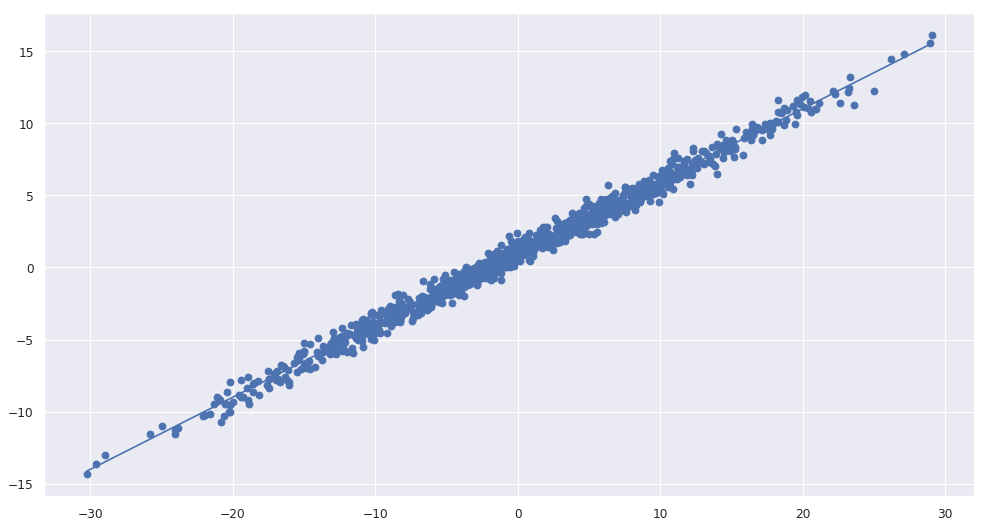

In [11]:
plt.figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
ax.scatter(X,y)
ax.plot(x_lin,y_lin)

# LaTeX

Here is a `newcommand` (see in the source):
$$\newcommand{gpvec}[1]{{\bf #1}}$$
$$\newcommand{bfvec}[1]{{\pmb{#1}}}$$
$$p(f_*|x_*, X, y) = \mathcal{N}\left(\frac{1}{\sigma_n^2}\gpvec{x_*}^TA^{-1}X\gpvec{y},\; \gpvec{x_*}^TA^{-1}\bfvec{x_*}\right)$$
$$A=\frac{1}{\sigma_n^2}XX^T+\Sigma_p^{-1}$$

# SymPy

In [12]:
import sympy
sympy.init_printing()

In [13]:
def myfn(x):
    return (x+1)*(x-2)*(x-2.5)*(x-4)

symx = sympy.symbols('x')
sympy.expand(myfn(symx))

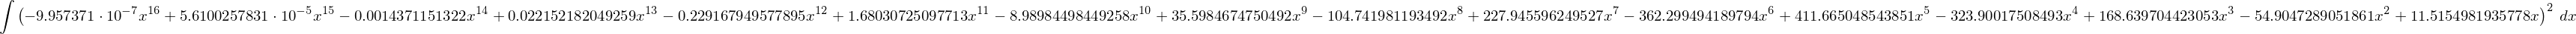

In [14]:
sx = sympy.symbols('x')
sfx = \
      -0.0000009957371   * sx**16 + \
       0.000056100257831 * sx**15 + \
      -0.0014371151322   * sx**14 + \
       0.022152182049259 * sx**13 + \
      -0.229167949577895 * sx**12 + \
       1.680307250977133 * sx**11 + \
      -8.98984498449258  * sx**10 + \
      35.59846747504916  * sx** 9 + \
    -104.74198119349185  * sx**8  + \
     227.94559624952703  * sx**7  + \
    -362.2994941897943   * sx**6  + \
     411.6650485438511   * sx**5  + \
    -323.9001750849299   * sx**4  + \
     168.63970442305256  * sx**3  + \
     -54.90472890518606  * sx**2  + \
      11.515498193577798 * sx
sfx2 = sfx**2
isfx2 = sympy.Integral(sfx2, sx)
isfx2

In [15]:
isfx2 = sympy.integrate(sfx2, (sx,0,6.56))
isfx2*sympy.pi

In [16]:
precision=50
sympy.N(isfx2*sympy.pi, precision)

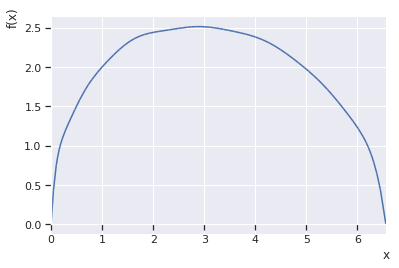

In [17]:
sympy.plotting.plot(sfx, (sx, 0, 6.56))

In [18]:
sa, sb, sc, sd = sympy.symbols(['a', 'b', 'c', 'd'])
se, sf, sg, sh = sympy.symbols('e f g h')

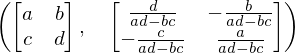

In [19]:
sm = sympy.Matrix([[sa, sb], [sc, sd]])
sm, sm.inv()

In [20]:
sympy.S("{:6.2f}".format(1.23))

In [21]:
solution = sympy.solveset(sympy.Eq(sx**2 - 1, 0), sx)
solution

In [22]:
list(solution)[0]